In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data = []
for file in os.listdir("D:/hahaton/time/data_test/data_test"):
    df_test = pd.read_csv("D:/hahaton/time/data_test/data_test/"+file)
    data.append(df_test)

In [65]:
reg = GradientBoostingRegressor()
reg = LinearRegression()


In [12]:
limit = {
    "H2":0.005,
    "C2H4":0.015,
    "C2H2":0.0008,
    "CO":0.053,
}

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [13]:
print(limit)
result = []
for z, d in enumerate(data):
    #print(z)
    
    x = [[i,] for i in range(len(d))]
    times = []
    for gas in ["H2","C2H2", "C2H4", "CO"]:
        reg=make_pipeline(PolynomialFeatures(2), LinearRegression())
        reg.fit(x, d[gas])
        k = 0
        concent = reg.predict([[k,]])[0]
        while concent < limit[gas]:
            concent = reg.predict([[k,]])[0]
            k+=1
            if k > 2000:
                break
        times.append(k)
    result.append(min(times))

{'H2': 0.005, 'C2H4': 0.015, 'C2H2': 0.0008, 'CO': 0.053}


In [14]:
result

[624,
 554,
 538,
 708,
 522,
 612,
 866,
 516,
 541,
 408,
 575,
 809,
 501,
 483,
 550,
 600,
 596,
 640,
 1223,
 1220,
 599,
 575,
 583,
 669,
 760,
 773,
 667,
 507,
 859,
 489,
 613,
 652,
 557,
 812,
 670,
 654,
 458,
 555,
 778,
 687,
 560,
 691,
 538,
 777,
 869,
 604,
 601,
 737,
 624,
 749,
 598,
 414,
 648,
 514,
 861,
 644,
 572,
 514,
 685,
 736,
 501,
 971,
 429,
 562,
 648,
 576,
 531,
 1036,
 477,
 884,
 490,
 625,
 588,
 556,
 644,
 545,
 674,
 572,
 576,
 765,
 524,
 493,
 501,
 565,
 526,
 721,
 619,
 755,
 514,
 560,
 585,
 782,
 581,
 682,
 609,
 646,
 1181,
 529,
 631,
 513,
 587,
 611,
 632,
 599,
 466,
 566,
 607,
 576,
 632,
 671,
 706,
 535,
 639,
 596,
 575,
 497,
 2001,
 634,
 809,
 626,
 489,
 561,
 623,
 726,
 533,
 725,
 506,
 695,
 592,
 674,
 820,
 680,
 647,
 667,
 776,
 868,
 541,
 547,
 974,
 524,
 509,
 614,
 746,
 603,
 599,
 722,
 542,
 477,
 520,
 860,
 701,
 505,
 696,
 569,
 520,
 610,
 619,
 500,
 584,
 465,
 530,
 566,
 868,
 708,
 773,
 709,

In [15]:
df = pd.DataFrame()

In [16]:
df["id"] = os.listdir("D:/hahaton/time/data_test/data_test")
df["predicted"] = result

In [17]:
df["predicted"]

0      624
1      554
2      538
3      708
4      522
      ... 
895    718
896    655
897    565
898    785
899    764
Name: predicted, Length: 900, dtype: int64

In [18]:
df.to_csv("D:/hahaton/time/test.csv", index=False)

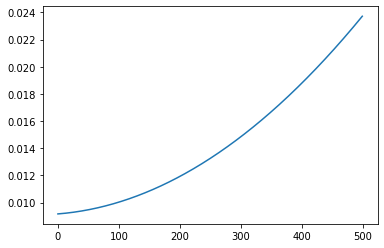

In [110]:
plt.plot(reg.predict([[i] for i in range(500)]))

In [103]:
reg

LinearRegression()

In [117]:
filename = "D:/hahaton/time/data_train/data_train/2_trans_497.csv"
limit = 550
reg=make_pipeline(PolynomialFeatures(4),LinearRegression())

In [118]:
d = pd.read_csv(filename)

In [120]:
for gas in ["H2","C2H2", "C2H4", "CO"]:
    reg.fit([[i,] for i in range(len(d))], d[gas])
    print(gas, reg.predict([[limit]]))

H2 [0.0034044]
C2H2 [0.00050527]
C2H4 [0.00904446]
CO [0.063483]


In [122]:
file_names = pd.read_csv("D:/hahaton/time/train.csv")
file_names.head()

,id,predicted
0,2_trans_497.csv,550
1,2_trans_483.csv,1093
2,2_trans_2396.csv,861
3,2_trans_1847.csv,1093
4,2_trans_2382.csv,488


In [149]:
result = []
concents = {
    "H2":[],
    "C2H2":[],
    "C2H4":[],
    "CO":[]
}

for i, r in file_names.iterrows():
    d = pd.read_csv("D:/hahaton/data_train/data_train/" + r["id"])
    limit = r["predicted"]
    for gas in ["H2","C2H2", "C2H4", "CO"]:
        reg=GradientBoostingRegressor()
        reg.fit([[i,] for i in range(len(d))], d[gas])
        
        concents[gas].append(reg.predict([[limit]])[0])


In [151]:
for gas in ["H2","C2H2", "C2H4", "CO"]:
    #l = list(filter(lambda x : x > 0, concents[gas]))
    l = concents[gas]
    print(gas, min(l), max(l), sum(l)/len(l))

H2 4.230673066586055e-05 0.005010862857163527 0.0024433124693314977
C2H2 1.2215791201152404e-07 0.0006004946124240817 0.00027144348728993216
C2H4 2.3919436436536256e-05 0.01501375708499327 0.0067553954042483925
CO 1.1688656425208237e-05 0.05315408941590136 0.023882999076160413


In [158]:
limit = {
    "H2":0.0024433124693314977,
    "C2H4":0.00027144348728993216,
    "C2H2":0.0067553954042483925,
    "CO":0.023882999076160413,
}

In [126]:
concents["H2"]

[0.003404400946051594,
 0.02337124356202875,
 0.002888124280439794,
 0.0024059795394627097,
 0.0030212367174278446,
 0.004911606108777543,
 0.007482036404987713,
 0.005653527602631504,
 0.012925359997742957,
 0.0045823835283517545,
 0.00933100707596709,
 0.0029552503248343456,
 0.0017044093897904504,
 0.17793227184164168,
 0.003643502719355053,
 0.02482744397837547,
 0.010095432716220765,
 0.10233136361582504,
 0.002343401818255228,
 0.016844537064410303,
 0.004529706669150808,
 0.007718836574000241,
 0.0031669353234049947,
 0.004728086822779853,
 0.005747083699920347,
 0.0036074272525493363,
 0.0021274225190446895,
 0.043980731437069764,
 0.10094875439030288,
 0.014588898722069745,
 0.0019246538684321293,
 0.0015789927046828622,
 0.007299967722605046,
 0.0065266161776015505,
 0.03785436256333343,
 0.004903394717126939,
 0.05301508073519346,
 0.07921641493995198,
 0.0732766245007312,
 0.003984106433316308,
 0.0013142122613201911,
 0.008479833691535252,
 0.0037032754809792775,
 0.008371